# <center>Binarry classifier for patient response to a particular drug</center>

### About the project

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y. 

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to. 

It is a sample of binary classifier and we will use classification algorithm to build a model from historical data of patients, and their respond to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

In [3]:
# import libraries
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
# reading the dataset
my_data = pd.read_csv("...\\drug200.csv")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
# dataset shape
my_data.shape

(200, 6)

## Pre-processing

A. Remove the target column since it doesn't contain numeric values.

In [6]:
# removing the dependent variable
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

B. Changing categorical columns["Sex" and "BP"] into numerical values.

In [7]:
# transforming catogirical columns in to numerical values
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

C. Assigning the target variable.

In [8]:
# assigning the target column
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

#### D. Splitting data

In [9]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

E. printing the shape of datasets to ensure that the dimenstions match.

In [10]:
# print the shape of datasets
print("The shape of X_trainset is:", X_trainset.shape)
print("The shape of y_trainset is:", y_trainset.shape)

print("The shape of X_testset is:", X_testset.shape)
print("The shape of X_trainset is:", y_testset.shape)

The shape of X_trainset is: (140, 5)
The shape of y_trainset is: (140,)
The shape of X_testset is: (60, 5)
The shape of X_trainset is: (60,)


## Modeling


In [11]:
# create an instance of the DecisionTreeClassifier called drugTree.
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
# fit the data with the training feature matrix X_trainset and training respose vector y_trainset
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
# making predicictions on the testing dataset
predTree = drugTree.predict(X_testset)

## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [14]:
# checking the accuracy of the model
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


## Visualization
Lets visualize the desicsion tree model we have created.

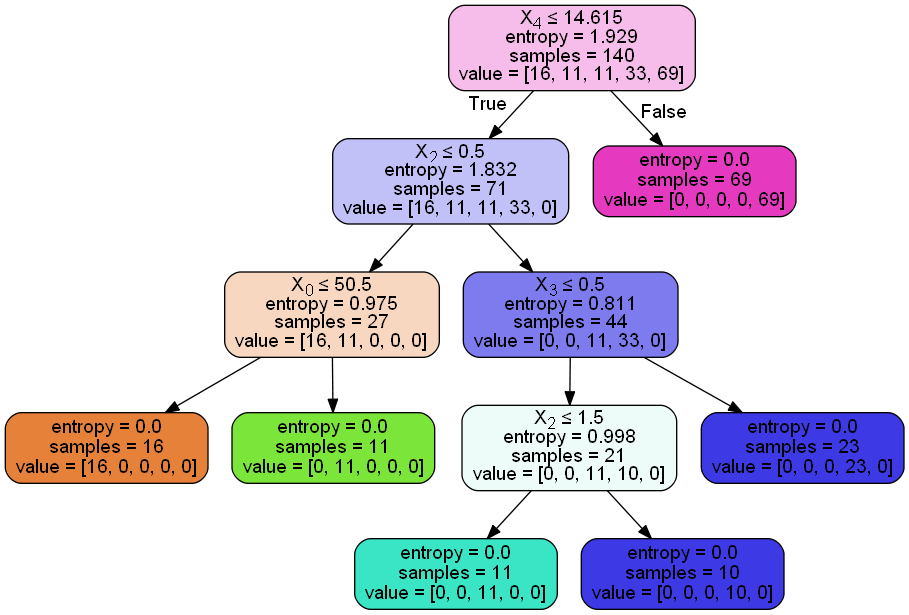

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(drugTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())





### <center> End of the project <center/>